<a href="https://colab.research.google.com/github/AngelineLawrence/Machine-Learning/blob/master/Classification%20Algorithms/SVM_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,norm

In [0]:
%matplotlib inline

In [0]:
df1 = pd.read_csv('train.csv')

**Data Exploration & Pre-processing**

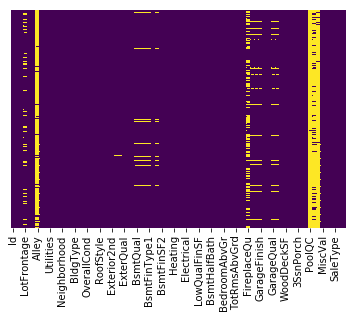

In [9]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

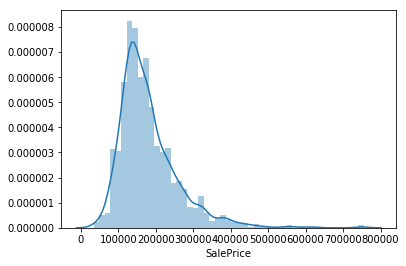

In [10]:
sns.distplot(df1.SalePrice)

In [11]:
df1['SalePrice'].skew()

1.8828757597682129

In [0]:
Y=np.log1p(df1['SalePrice'])

In [13]:
Y.skew()

0.12134661989685333

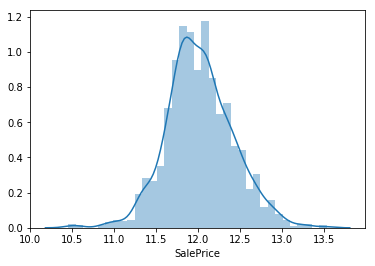

In [14]:
sns.distplot(Y)

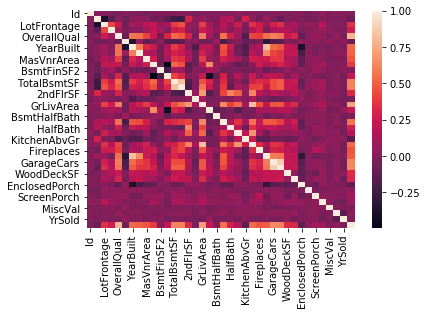

In [15]:
sns.heatmap(df1.corr())

In [0]:
df1_Id=df1['Id']

In [0]:
df1.drop("Id",axis =1,inplace = True)

**Handling missing/null values**

In [0]:
missing_value_features=(df1.isnull().sum()/ len(df1)) * 100

In [0]:
missing_value_features=missing_value_features.drop(missing_value_features[missing_value_features == 0].index).sort_values(ascending = True)

In [20]:
missing_value_features

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [0]:
missing_value_features=missing_value_features.drop(missing_value_features[missing_value_features < 50].index).sort_values(ascending = True)

In [22]:
missing_value_features

Fence          80.753425
Alley          93.767123
MiscFeature    96.301370
PoolQC         99.520548
dtype: float64

In [0]:
for col in missing_value_features.index:
    df1.drop(col,axis =1,inplace = True)

In [24]:
df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [0]:
for col in ('GarageType','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    df1[col] = df1[col].fillna('None')

In [0]:
for col in ('GarageYrBlt','GarageArea', 'GarageCars','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    df1[col] = df1[col].fillna(0)

In [0]:
df1["LotFrontage"] = df1.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.mean()))

In [0]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    df1[col]=df1[col].fillna(df1[col].mode()[0])
df1["MasVnrArea"] = df1["MasVnrArea"].fillna(0)

In [0]:
df1['MSSubClass']= df1['MSSubClass'].apply(str)
df1['OverallCond'] =df1['OverallCond'].astype(str)
df1['YrSold'] = df1['YrSold'].astype(str)
df1['MoSold'] = df1['MoSold'].astype(str)

In [0]:
numeric_features = df1.dtypes[df1.dtypes != "object"].index

In [31]:
numeric_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df1[c].values))
    df1[c] = lbl.transform(list(df1[c].values))

In [33]:
df1[numeric_features]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.000000,8450,7,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500
1,80.000000,9600,6,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500
2,68.000000,11250,7,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500
3,60.000000,9550,7,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000
4,84.000000,14260,8,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000
5,85.000000,14115,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,143000
6,75.000000,10084,8,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,307000
7,81.288889,10382,7,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,200000
8,51.000000,6120,7,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,129900
9,50.000000,7420,5,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,118000


In [0]:
X=df1[numeric_features]

In [36]:
df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [37]:
df1.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [38]:
df1.HouseStyle

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
5       1.5Fin
6       1Story
7       2Story
8       1.5Fin
9       1.5Unf
10      1Story
11      2Story
12      1Story
13      1Story
14      1Story
15      1.5Unf
16      1Story
17      1Story
18      1Story
19      1Story
20      2Story
21      1.5Unf
22      1Story
23      1Story
24      1Story
25      1Story
26      1Story
27      1Story
28      1Story
29      1Story
         ...  
1430    2Story
1431    1Story
1432    1Story
1433    2Story
1434    1Story
1435    1Story
1436    1Story
1437    1Story
1438    1Story
1439      SLvl
1440    2.5Fin
1441    1Story
1442    2Story
1443    1.5Unf
1444    1Story
1445    SFoyer
1446    1Story
1447    2Story
1448    2Story
1449    SFoyer
1450    2Story
1451    1Story
1452      SLvl
1453    1Story
1454    1Story
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'])
Y = le.transform(df1['HouseStyle']) 
Y

array([5, 2, 5, ..., 5, 2, 2])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Support Vector Machine**

In [0]:
from sklearn.svm import SVC

In [0]:
svm = SVC(kernel='linear', C=1.0)

In [44]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
predictions = svm.predict(X_test_std)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        52
           1       0.33      0.25      0.29         4
           2       0.89      0.99      0.93       207
           3       1.00      0.25      0.40         4
           4       0.25      0.50      0.33         2
           5       0.87      0.89      0.88       140
           6       0.50      0.17      0.25        12
           7       0.60      0.18      0.27        17

    accuracy                           0.85       438
   macro avg       0.65      0.49      0.51       438
weighted avg       0.84      0.85      0.83       438



In [46]:
print(accuracy_score(y_test,predictions))

0.8493150684931506


In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Accuracy:", metrics.accuracy_score(y_test, svm.predict(X_test_std)))

MAE: 0.6095890410958904
MSE: 2.8059360730593608
RMSE: 1.6750928550559103
Accuracy: 0.8493150684931506


Text(0, 0.5, 'Predicted Y')

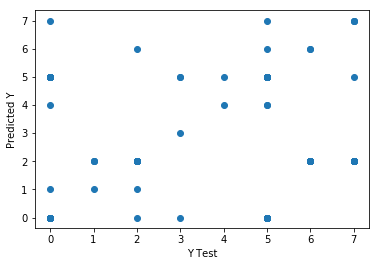

In [48]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')